<a href="https://colab.research.google.com/github/LuscasD/ArTest_LucasRyan/blob/main/AprendizadoDeMaquina_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from tqdm import tqdm
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, confusion_matrix

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

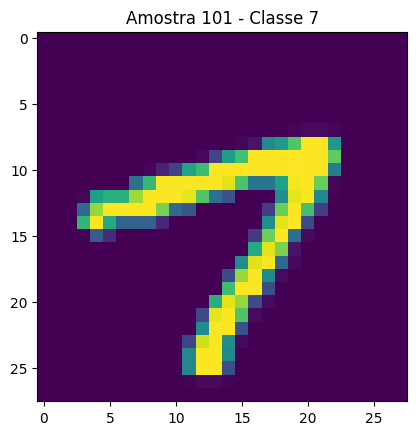

In [ ]:
i = 101
plt.imshow(trainset[i][0][0])
plt.title(f'Amostra {i} - Classe {trainset[i][1]}')
plt.show()

In [ ]:
# Preparando loaders de Pytorch
trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=1000, shuffle=False)

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # 28px X 28px
        self.fc2 = nn.Linear(128, 10)  # Saída de 10 classes para o MNIST

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Epoch 1/5 - Avg Loss: 0.4352


Epoch 2/5 - Avg Loss: 0.2336


Epoch 3/5 - Avg Loss: 0.1704


Epoch 4/5 - Avg Loss: 0.1342


Epoch 5/5 - Avg Loss: 0.1104


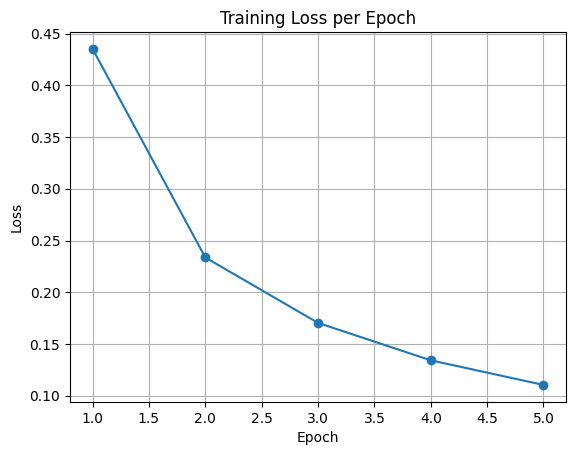

In [ ]:
# Instanciar a rede, a função de perda e o otimizador
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Treinamento
epochs = 5
epoch_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    progress_bar = tqdm(trainloader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    avg_loss = running_loss / len(trainloader)
    epoch_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs} - Avg Loss: {avg_loss:.4f}")

# Plot training loss per epoch
plt.figure()
plt.plot(range(1, epochs+1), epoch_losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.grid(True)
plt.show()

Accuracy on test set: 96.57%
F1 Macro: 0.9654


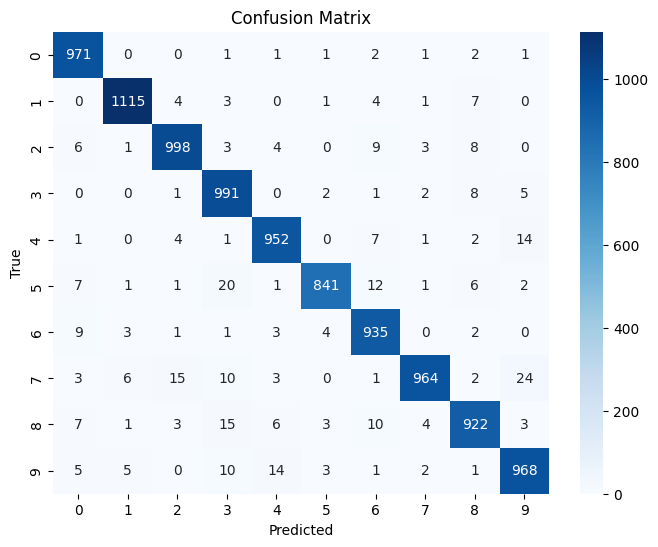

In [ ]:
# Avaliação no conjunto de teste
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Acuracia
accuracy = (np.array(y_true) == np.array(y_pred)).mean() * 100
print(f'Accuracy on test set: {accuracy:.2f}%')

# F1-macro score only
f1_macro = f1_score(y_true, y_pred, average='macro')
print(f'F1 Macro: {f1_macro:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

LeNet simplificada

In [ ]:
class LeNetSimp(nn.Module):
    def __init__(self):
        super(LeNetSimp, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)  # MNIST tem 1 canal de entrada
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # As dimensões após o conv2 dependem do tamanho da entrada
        self.fc2 = nn.Linear(120, 10)  # Saída de 10 classes para o MNIST

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 16 * 4 * 4)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Epoch 1/5 - Avg Loss: 0.3132


Epoch 2/5 - Avg Loss: 0.0841


Epoch 3/5 - Avg Loss: 0.0596


Epoch 4/5 - Avg Loss: 0.0475


Epoch 5/5 - Avg Loss: 0.0382


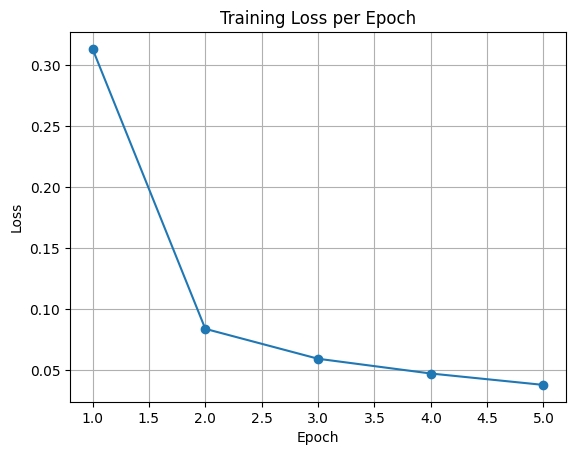

In [ ]:
# Instanciar a rede, a função de perda e o otimizador
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeNetSimp().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Treinamento
epochs = 5
epoch_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    progress_bar = tqdm(trainloader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    avg_loss = running_loss / len(trainloader)
    epoch_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs} - Avg Loss: {avg_loss:.4f}")

# Plot training loss per epoch
plt.figure()
plt.plot(range(1, epochs+1), epoch_losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.grid(True)
plt.show()

Accuracy on test set: 98.78%
F1 Macro: 0.9877


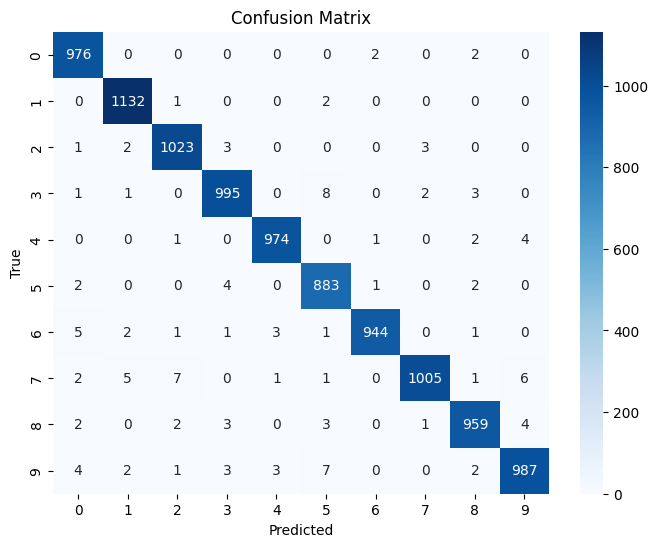

In [ ]:
# Avaliação no conjunto de teste
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Accuracy
accuracy = (np.array(y_true) == np.array(y_pred)).mean() * 100
print(f'Accuracy on test set: {accuracy:.2f}%')

# F1-macro score only
f1_macro = f1_score(y_true, y_pred, average='macro')
print(f'F1 Macro: {f1_macro:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

##LeNet - 5

In [ ]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        # A LeNet-5 original usava sigmoid, mas ReLU é mais comum e eficaz hoje em dia.
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        # Camada de Pooling 1: Max Pooling com kernel de tamanho 2x2 e stride 2. Reduz a dimensionalidade espacial.
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Camada Convolucional 2: 6 canais de entrada (saída da conv1), 16 canais de saída, kernel de tamanho 5x5.
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        # Camada de Pooling 2: Max Pooling com kernel de tamanho 2x2 e stride 2. Reduz ainda mais a dimensionalidade espacial.
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        # Camada Totalmente Conectada 2: 120 neurônios de entrada, 84 neurônios de saída.
        self.fc2 = nn.Linear(120, 84)
        # Camada Totalmente Conectada 3: 84 neurônios de entrada, 10 neurônios de saída (para as 10 classes do MNIST).
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Aplica a primeira camada convolucional, seguida por ReLU e Max Pooling.
        x = self.pool1(torch.relu(self.conv1(x)))
        # Aplica a segunda camada convolucional, seguida por ReLU e Max Pooling.
        x = self.pool2(torch.relu(self.conv2(x)))
        # Achata a saída das camadas convolucionais para que possa ser usada pelas camadas totalmente conectadas.
        # O -1 infere o tamanho do batch. 16 * 4 * 4 é o número de features após o flattening.
        x = x.view(-1, 16 * 4 * 4)
        # Aplica a primeira camada totalmente conectada, seguida por ReLU.
        x = torch.relu(self.fc1(x))
        # Aplica a segunda camada totalmente conectada, seguida por ReLU.
        x = torch.relu(self.fc2(x))
        # Aplica a terceira e última camada totalmente conectada. Esta é a camada de saída.
        x = self.fc3(x)
        return x

## Treinar lenet-5


Epoch 1/5 - Avg Loss: 0.3711


Epoch 2/5 - Avg Loss: 0.0936


Epoch 3/5 - Avg Loss: 0.0653


Epoch 4/5 - Avg Loss: 0.0521


Epoch 5/5 - Avg Loss: 0.0422


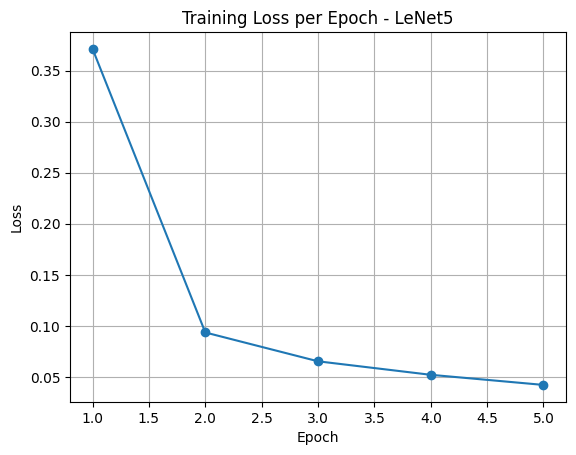

In [ ]:
# Instanciar a rede LeNet5 e movê-la para o dispositivo apropriado (GPU se disponível, caso contrário CPU).
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_lenet5 = LeNet5().to(device)

# Definir a função de perda
criterion = nn.CrossEntropyLoss()

# Definir o otimizador
#optimizer = optim.Adam(model.parameters(), lr=0.001) A primeira vez fiz errado não utilizando o LeNet5
optimizer = optim.Adam(model_lenet5.parameters(), lr=0.001)

# épocas de treinamento.
epochs = 5# talvez aumentar
# Lista para armazenar a perda média de cada época para plotagem posterior.
epoch_losses = []

# Loop de treinamento pelas épocas.
for epoch in range(epochs):
    # Inicializar a perda acumulada para a época atual.
    running_loss = 0.0
    # Criar uma barra de progresso usando tqdm para visualizar o andamento do treinamento.
    progress_bar = tqdm(trainloader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)

    # Loop sobre os batches do dataloader de treinamento.
    for inputs, labels in progress_bar:
        # Mover os dados de entrada e rótulos para o dispositivo (GPU ou CPU).
        inputs, labels = inputs.to(device), labels.to(device)

        # Zerar os gradientes acumulados do otimizador.
        optimizer.zero_grad()

        # Realizar o forward pass: passar os dados de entrada pela rede para obter as saídas.
        outputs = model_lenet5(inputs)
        # Calcular a perda comparando as saídas do modelo com os rótulos verdadeiros.
        loss = criterion(outputs, labels)

        # Realizar o backward pass: calcular os gradientes da função de perda em relação aos parâmetros do modelo.
        loss.backward()
        # Atualizar os parâmetros do modelo usando o otimizador.
        optimizer.step()

        # Acumular a perda do batch atual.
        running_loss += loss.item()
        # Atualizar a barra de progresso com a perda do batch atual.
        progress_bar.set_postfix(loss=loss.item())

    # Calcular a perda média para a época atual.
    avg_loss = running_loss / len(trainloader)
    # Adicionar a perda média da época à lista de perdas.
    epoch_losses.append(avg_loss)
    # Imprimir a perda média da época.
    print(f"Epoch {epoch+1}/{epochs} - Avg Loss: {avg_loss:.4f}")

# Plotar a perda de treinamento por época.
plt.figure()
plt.plot(range(1, epochs+1), epoch_losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch - LeNet5")
plt.grid(True)
plt.show()

Accuracy on test set (LeNet-5): 98.57%
F1 Macro (LeNet-5): 0.9858


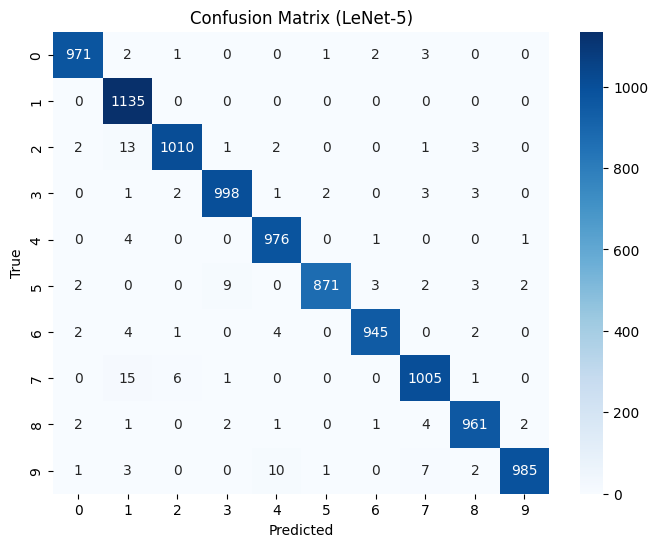

In [ ]:
model_lenet5.eval()
y_true_lenet5 = [] # Lista para armazenar os rótulos verdadeiros
y_pred_lenet5 = [] # Lista para armazenar as previsões do modelo

# Desativa o cálculo de gradientes para economizar memória e computação durante a avaliação.
with torch.no_grad():
    # Itera sobre os batches do dataloader de teste.
    for inputs, labels in testloader:
        # Move os dados de entrada e rótulos para o dispositivo (GPU ou CPU).
        inputs, labels = inputs.to(device), labels.to(device)

        # Realiza o forward pass: passa os dados de entrada pelo modelo para obter as saídas (logits).
        outputs = model_lenet5(inputs)
        # Obtém a classe prevista com a maior pontuação (logit).
        _, predicted = torch.max(outputs.data, 1)
        # Estende as listas com os rótulos verdadeiros e as previsões do batch atual.
        y_true_lenet5.extend(labels.cpu().numpy())
        y_pred_lenet5.extend(predicted.cpu().numpy())

# Calcula a acurácia comparando os rótulos verdadeiros com as previsões.
accuracy_lenet5 = (np.array(y_true_lenet5) == np.array(y_pred_lenet5)).mean() * 100
print(f'Accuracy on test set (LeNet-5): {accuracy_lenet5:.2f}%')
# Calcula o F1-macro score.
f1_macro_lenet5 = f1_score(y_true_lenet5, y_pred_lenet5, average='macro')
print(f'F1 Macro (LeNet-5): {f1_macro_lenet5:.4f}')

# Gera a matriz de confusão.
cm_lenet5 = confusion_matrix(y_true_lenet5, y_pred_lenet5)
plt.figure(figsize=(8,6))
# Cria um heatmap da matriz de confusão usando Seaborn para visualização.
sns.heatmap(cm_lenet5, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted") # Rótulo do eixo x
plt.ylabel("True")     # Rótulo do eixo y
plt.title("Confusion Matrix (LeNet-5)") # Título do gráfico
plt.show() # Exibe o gráfico

##LeNet Modificada

In [ ]:
class LeNetModificada(nn.Module):

    def __init__(self):
        super(LeNetModificada, self).__init__()

        # Primeira camada convolucional
        self.conv1 = nn.Conv2d(1, 12, kernel_size=5)

        # Segunda camada convolucional (inspirada na LeNet Simplificada, mas com parâmetros dobrados)
        self.conv2 = nn.Conv2d(12, 32, kernel_size=5)

        # Camadas de Pooling
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Camada convolucional extra
        self.conv3_extra = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        # Camadas totalmente conectadas
        self.fc1 = nn.Linear(64 * 4 * 4, 240)
        self.fc2 = nn.Linear(240, 168)
        self.fc3 = nn.Linear(168, 10)

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = torch.relu(self.conv3_extra(x))
        x = x.view(-1, 64 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Epoch 1/5 - Avg Loss: 0.2414


Epoch 2/5 - Avg Loss: 0.0566


Epoch 3/5 - Avg Loss: 0.0377


Epoch 4/5 - Avg Loss: 0.0287


Epoch 5/5 - Avg Loss: 0.0240


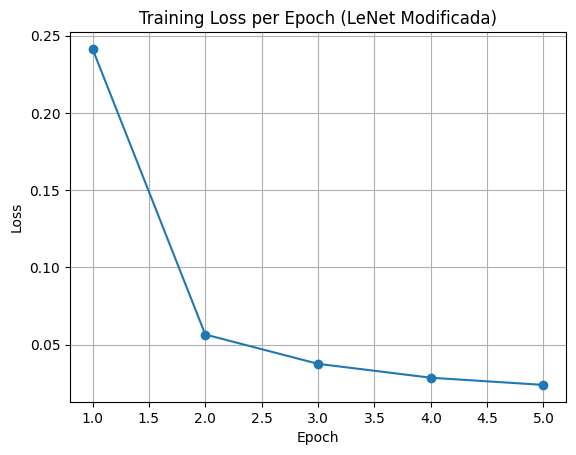

In [ ]:
# Instanciar a rede LeNetModificada, a função de perda e o otimizador
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_lenet_modificada = LeNetModificada().to(device)
criterion_lenet_modificada = nn.CrossEntropyLoss()
optimizer_lenet_modificada = optim.Adam(model_lenet_modificada.parameters(), lr=0.001)

# Treinamento
epochs = 5
epoch_losses_lenet_modificada = []

for epoch in range(epochs):
    running_loss = 0.0
    progress_bar = tqdm(trainloader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer_lenet_modificada.zero_grad()
        outputs = model_lenet_modificada(inputs)
        loss = criterion_lenet_modificada(outputs, labels)
        loss.backward()
        optimizer_lenet_modificada.step()

        running_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    avg_loss = running_loss / len(trainloader)
    epoch_losses_lenet_modificada.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs} - Avg Loss: {avg_loss:.4f}")

# Plot training loss per epoch
plt.figure()
plt.plot(range(1, epochs+1), epoch_losses_lenet_modificada, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch (LeNet Modificada)")
plt.grid(True)
plt.show()

Accuracy on test set (LeNet Modificada): 98.97%
F1 Macro (LeNet Modificada): 0.9896


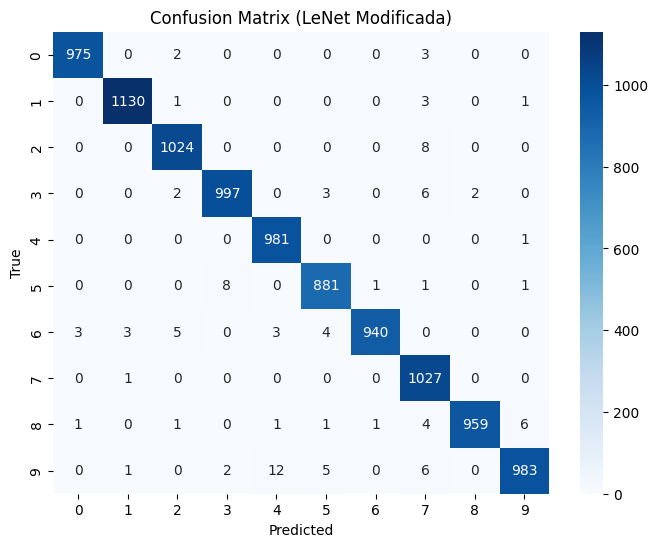

In [ ]:
# Avaliação do modelo LeNet Modificada no conjunto de teste
# Coloca o modelo em modo de avaliação.
model_lenet_modificada.eval()
y_true_lenet_modificada = [] # Lista para armazenar os rótulos verdadeiros
y_pred_lenet_modificada = [] # Lista para armazenar as previsões do modelo

# Desativa o cálculo de gradientes.
with torch.no_grad():
    # Itera sobre os batches do dataloader de teste.
    for inputs, labels in testloader:
        # Move os dados para o dispositivo.
        inputs, labels = inputs.to(device), labels.to(device)

        # Realiza o forward pass.
        outputs = model_lenet_modificada(inputs)
        # Obtém a classe prevista.
        _, predicted = torch.max(outputs.data, 1)

        # Estende as listas com os rótulos verdadeiros e as previsões.
        y_true_lenet_modificada.extend(labels.cpu().numpy())
        y_pred_lenet_modificada.extend(predicted.cpu().numpy())

# Calcula a acurácia.
accuracy_lenet_modificada = (np.array(y_true_lenet_modificada) == np.array(y_pred_lenet_modificada)).mean() * 100
print(f'Accuracy on test set (LeNet Modificada): {accuracy_lenet_modificada:.2f}%')

# Calcula o F1-macro score.
f1_macro_lenet_modificada = f1_score(y_true_lenet_modificada, y_pred_lenet_modificada, average='macro')
print(f'F1 Macro (LeNet Modificada): {f1_macro_lenet_modificada:.4f}')

# Gera a matriz de confusão.
cm_lenet_modificada = confusion_matrix(y_true_lenet_modificada, y_pred_lenet_modificada)
plt.figure(figsize=(8,6))
# Cria um heatmap da matriz de confusão.
sns.heatmap(cm_lenet_modificada, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (LeNet Modificada)")
plt.show()

In [ ]:
print('Resultados do F1 respectivamente')

print(f'F1 Macro (LeNet Modificada): {f1_macro_lenet_modificada:.4f}')
print(f'F1 Macro (LeNet-5): {f1_macro_lenet5:.4f}')
print(f'F1 Macro: {f1_macro:.4f}')


print('Resultados da Acurácia respectivamente')

print(f'Accuracy on test set (LeNet Modificada): {accuracy_lenet_modificada:.2f}%')
print(f'Accuracy on test set (LeNet-5): {accuracy_lenet5:.2f}%')
print(f'Accuracy on test set (LeNetSimplificada): {accuracy:.2f}%')




Resultados do F1 respectivamente
F1 Macro (LeNet Modificada): 0.9896
F1 Macro (LeNet-5): 0.9858
F1 Macro: 0.9877
Resultados da Acurácia respectivamente
Accuracy on test set (LeNet Modificada): 98.97%
Accuracy on test set (LeNet-5): 98.57%
Accuracy on test set (LeNetSimplificada): 98.78%


## Comparando Nossas Redes Neurais!

**O que aprendemos olhando para esses números:**

*   O **MLP** (aquele que "achata" a imagem) é o mais simples. Ele consegue um resultado legal, mas não é o melhor para imagens porque não entende muito bem onde as coisas estão na foto (as características espaciais).
*   A **LeNet Simplificada** já usa "filtros" (camadas convolucionais) e "diminui" a imagem (pooling). Isso ajuda muito! Ela já foi bem melhor que o MLP porque consegue pegar as formas e detalhes dos números.
*   A **LeNet-5** é uma versão mais "turbinada" da ideia da LeNet. teve uma acurácia e F1 Macro melhores que a LeNet Simplificada. As camadas extras e a forma como se conectam ajudam ela a aprender mais.
*   A **LeNet Modificada** é a que fizemos A gente colocou mais uma camada de "filtros" (convolução) e deixou as outras camadas "maiores" (dobramos os parâmetros). A ideia era ver se ficava ainda melhor. Pelos números, podemos comparar se essa mudança ajudou ou atrapalhou comparado com a LeNet-5 "normal". Às vezes, deixar o modelo muito grande pode fazer ele "decorar" o treino e ir mal no teste, mas no nosso caso, o MNIST é simples, então talvez ajude!